# Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Data

In [35]:
# simple data with dictionary
prices = {'area':[2600,3000,3200,3600,4000],
          'price':[550000,565000,610000,680000,725000]}
df = pd.DataFrame(prices, index=[x for x in range(len(prices['area']))])
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


# Visualizing data

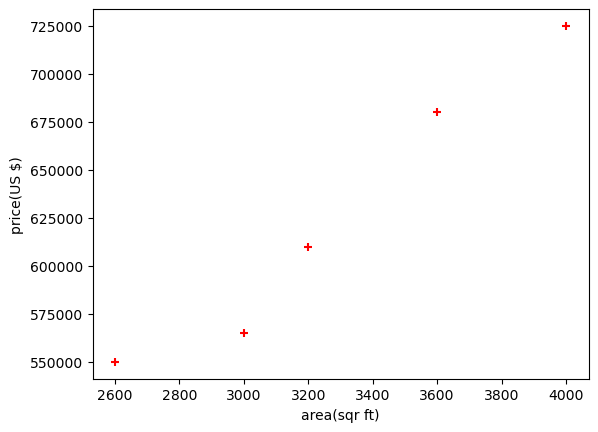

In [49]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US $)')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.show()

# Model Creation

In [58]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df['price']) # it won't accept df['area'] because it should be 2dimensional may be multiple columns can be selected

LinearRegression()

# Prediction

In [71]:
reg.predict([[3000]]) # same you have to use the 2D values to predict

C:\Users\syamp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([587979.45205479])

# How we got that value

In [75]:
reg.coef_ # value of m

array([135.78767123])

In [77]:
reg.intercept_ # value of c

180616.43835616432

In [82]:
# y=m*x+b
135.78767123*3000+180616.43835616432 # thats how we got

587979.4520461643

# Predicting many values using the model

In [97]:
to_predict = {'area':[1000,1500,2300,3540,4120,4560,5490,3460,4750,2300,9000,8600,7100]}
reg.predict(np.array(to_predict['area']).reshape(-1,1)) # we are using numpy for reshaping and we are reshaping because we need a 2D array like [[a],[b],...,[n]]

C:\Users\syamp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

# Convert the predictions into new csv file and store

In [102]:
# df.to_csv('predicted_prices', index=False) # no new index

# Visualize the regression line

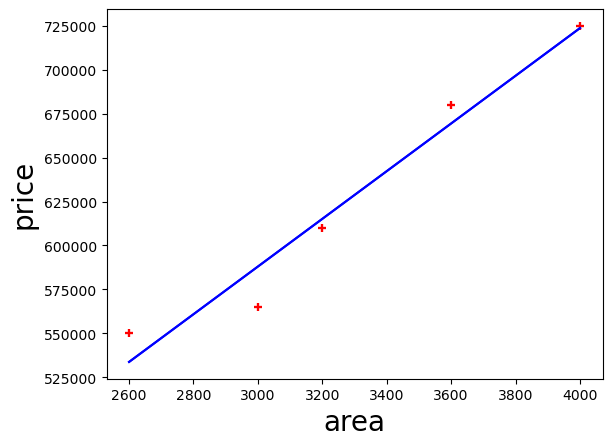

In [111]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')
plt.show()